In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("Advertising.csv")

In [29]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
X = df.drop('sales', axis=1)

In [31]:
y = df['sales']

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
polynomial_converter = PolynomialFeatures(degree=2,  include_bias=False)

In [34]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [35]:
poly_features = polynomial_converter.transform(X)

In [36]:
poly_features.shape

(200, 9)

In [37]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [38]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [39]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [40]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [41]:
poly_features.shape

(200, 9)

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
test_predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
MAE = mean_absolute_error(y_test, test_predictions)

In [52]:
MSE = mean_squared_error(y_test, test_predictions)

In [53]:
RMSE = np.sqrt(MSE)

In [54]:
MAE

0.547583791914956

In [55]:
RMSE

0.6784587307926759

In [57]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1, 10):

    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)




In [58]:
train_rmse_errors


[1.5526939990087727,
 0.6057702019226605,
 0.47568472931843403,
 0.3742987908933857,
 0.2410875794579549,
 0.19739819744255369,
 3.547978871890302,
 0.11493236073998069,
 0.11468456206575199]

In [59]:
test_rmse_errors

[1.9307843822347202,
 0.6784587307926759,
 0.5148267621787931,
 1.2750589608361067,
 6.410816066115307,
 24.592624298827314,
 552.5824204218115,
 9287.594824157979,
 185160.25979588018]

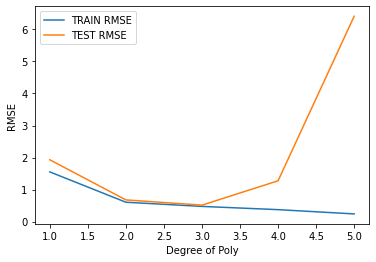

In [63]:
plt.plot(range(1, 6), train_rmse_errors[:5], label="TRAIN RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label="TEST RMSE")

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [64]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [65]:
final_model = LinearRegression()

In [68]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [69]:
from joblib import  dump, load

In [70]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [71]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [72]:
loaded_converter = load('final_converter.joblib')

In [73]:
loaded_model = load('final_poly_model.joblib')

In [74]:
campaign = [[149, 22, 12]]

In [76]:
transformed_data = loaded_converter.fit_transform(campaign)

In [77]:
loaded_model.predict(transformed_data)

array([14.64501014])